In [1]:
%store -r df

print(df.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  CabinLetter_B  ...  Title_Major  Title_Master  Title_Miss  \
0        True          False  ...        False         False       False   
1       False          False  ...        False         False       False   
2        True          False  ...        False         False        True   
3        True          False  ...        False         False       False   
4        True          False  ...        False         False       False   

   Title_Mlle  Title_Mme  Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  
0       False     

In [2]:
# Set target and features
X = df.drop(columns=["Survived"])
y = df["Survived"]

Fare             0.219673
Age              0.209106
Sex_male         0.113811
Title_Mr         0.111627
Pclass           0.065267
SibSp            0.052062
Title_Mrs        0.042262
Title_Miss       0.035335
CabinLetter_U    0.032974
Parch            0.032748
dtype: float64


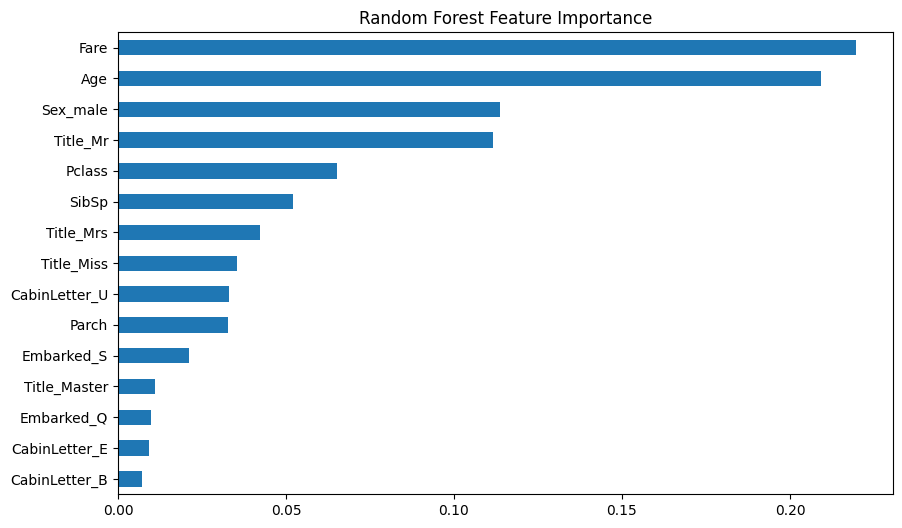

In [ ]:
# Random Forest Importance
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X, y)

# Feature importance
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(rf_importances.head(10))  # top 10

# Plot
plt.figure(figsize=(10,6))
rf_importances.head(15).plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()


Fare             0.117957
Age              0.113356
Pclass           0.081481
SibSp            0.056341
Title_Mr         0.047026
CabinLetter_U    0.044893
Sex_male         0.039843
Embarked_S       0.035690
Parch            0.025365
Embarked_Q       0.010662
dtype: float64


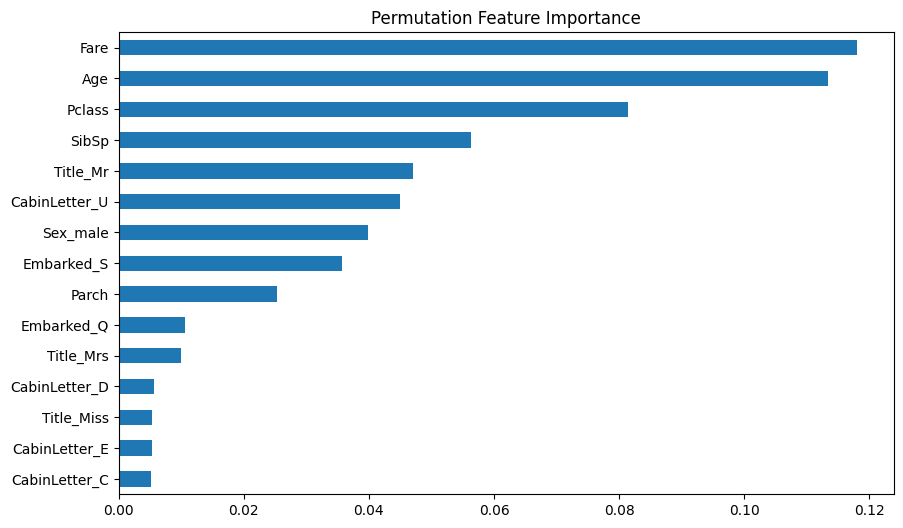

In [ ]:
# Permutation Importance
from sklearn.inspection import permutation_importance

perm = permutation_importance(rf, X, y, n_repeats=10, random_state=42)
perm_importances = pd.Series(perm.importances_mean, index=X.columns).sort_values(ascending=False)
print(perm_importances.head(10))

# Plot
plt.figure(figsize=(10,6))
perm_importances.head(15).plot(kind='barh')
plt.title("Permutation Feature Importance")
plt.gca().invert_yaxis()
plt.show()


Title_Master     2.588290
Sex_male         2.291226
CabinLetter_E    0.922667
Pclass           0.753275
Title_Mrs        0.718617
CabinLetter_D    0.620645
Title_Mr         0.564570
SibSp            0.509352
CabinLetter_U    0.374100
Parch            0.316422
dtype: float64


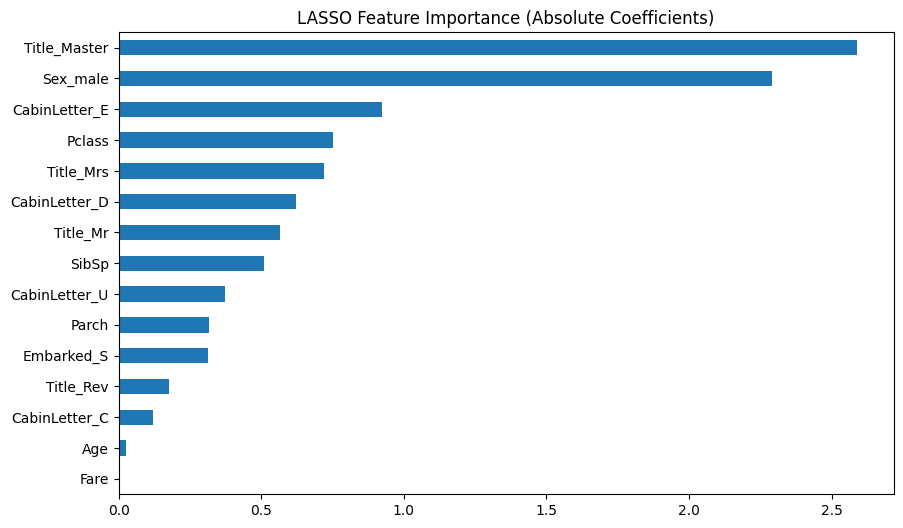

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# LASSO Logistic Regression
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
lasso.fit(X, y)

# Absolute coefficient importance
lasso_importances = pd.Series(np.abs(lasso.coef_[0]), index=X.columns).sort_values(ascending=False)
print(lasso_importances.head(10))

# Optional plot
plt.figure(figsize=(10,6))
lasso_importances.head(15).plot(kind='barh')
plt.title("LASSO Feature Importance (Absolute Coefficients)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Combine Importances and Normalise to compare

def normalise(series):
    return (series - series.min()) / (series.max() - series.min())

rf_norm = normalise(rf_importances)
perm_norm = normalise(perm_importances)
lasso_norm = normalise(lasso_importances)

# Combine into one DataFrame
combined_importance = pd.DataFrame({
    "RF": rf_norm,
    "Permutation": perm_norm,
    "LASSO": lasso_norm
}).sort_values(by="RF", ascending=False)  # sort by any one method for display

combined_importance['Overall'] = combined_importance.mean(axis=1)
combined_importance = combined_importance.sort_values(by='Overall', ascending=False)
combined_importance.head(15)


,RF,Permutation,LASSO,Overall
Fare,1.000000,1.000000,0.001769,0.667256
Age,0.951885,0.960990,0.009862,0.640912
Sex_male,0.517973,0.337774,0.885228,0.580325
Pclass,0.296934,0.690771,0.291032,0.426245
Title_Mr,0.508028,0.398668,0.218125,0.374940
Title_Master,0.049815,0.010466,1.000000,0.353427
SibSp,0.236807,0.477640,0.196791,0.303746
CabinLetter_U,0.149894,0.380590,0.144536,0.225007
Title_Mrs,0.192184,0.084681,0.277642,0.184836
Embarked_S,0.095423,0.302569,0.121457,0.173150


In [8]:
# Keep top 8 features for only
top_features = combined_importance.head(8).index.tolist()
df = df[top_features + ['Survived']]
%store df

Stored 'df' (DataFrame)
